- **DESCRIPTION**

**It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).**

- **Dataset Description**

**This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.**

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# importing data
train=pd.read_excel(r'C:\Users\hussa\Downloads\Project_3 datasets (train and test)retail\Project 3 datasets\train.xlsx')
test=pd.read_excel(r'C:\Users\hussa\Downloads\Project_3 datasets (train and test)retail\Project 3 datasets\test.xlsx')

In [3]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [4]:
train.shape , test.shape

((379336, 8), (162573, 8))

In [5]:
train.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
test.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162573 non-null  object        
 1   StockCode    162573 non-null  object        
 2   Description  162082 non-null  object        
 3   Quantity     162573 non-null  int64         
 4   InvoiceDate  162573 non-null  datetime64[ns]
 5   UnitPrice    162573 non-null  float64       
 6   CustomerID   121753 non-null  float64       
 7   Country      162573 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB


In [9]:
train.describe()

,Quantity,UnitPrice,CustomerID
count,379336.000000,379336.000000,285076.000000
mean,9.517272,4.681474,15288.302463
std,259.070548,105.799352,1712.323663
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13958.750000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
test.describe()

,Quantity,UnitPrice,CustomerID
count,162573.000000,162573.000000,121753.000000
mean,9.633863,4.446940,15286.257866
std,43.862669,71.344746,1716.591938
min,-3667.000000,-11062.060000,12347.000000
25%,1.000000,1.250000,13940.000000
50%,3.000000,2.080000,15150.000000
75%,10.000000,4.130000,16794.000000
max,3114.000000,13541.330000,18287.000000


In [11]:
#checking missing values
train.isnull().sum() , test.isnull().sum()

(InvoiceNo          0
 StockCode          0
 Description      963
 Quantity           0
 InvoiceDate        0
 UnitPrice          0
 CustomerID     94260
 Country            0
 dtype: int64,
 InvoiceNo          0
 StockCode          0
 Description      491
 Quantity           0
 InvoiceDate        0
 UnitPrice          0
 CustomerID     40820
 Country            0
 dtype: int64)

**in such case the missing values are values which can not be replaced with another value so deleting the rows with missing values is the convient solution**

In [12]:
#treating missing values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [13]:
train.isnull().sum() , test.isnull().sum()

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64)

In [14]:
train.shape , test.shape

((285076, 8), (121753, 8))

In [15]:
train.Description.nunique()

3833

In [16]:
test.Description.nunique()

3564

In [17]:
train.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1442
REGENCY CAKESTAND 3 TIER              1314
JUMBO BAG RED RETROSPOT               1151
PARTY BUNTING                         1007
ASSORTED COLOUR BIRD ORNAMENT          990
                                      ... 
DANISH ROSE UMBRELLA STAND               1
WRAP SUMMER ROSE DESIGN                  1
TURQ PENDANT TRIPLE SHELL NECKLACE       1
NECKLACE+BRACELET SET BLUE BLOSSOM       1
VINTAGE BEAD PINK JEWEL STAND            1
Name: Description, Length: 3833, dtype: int64

In [18]:
test.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     628
REGENCY CAKESTAND 3 TIER               591
JUMBO BAG RED RETROSPOT                511
ASSORTED COLOUR BIRD ORNAMENT          428
LUNCH BAG RED RETROSPOT                419
                                      ... 
AMETHYST HOOP EARRING FLORAL LEAF        1
LETTER "U" BLING KEY RING                1
3 BLACK CATS W HEARTS BLANK CARD         1
CLAM SHELL LARGE                         1
ROUND ARTICULATED PINK CLOCK W/SUCK      1
Name: Description, Length: 3564, dtype: int64

In [19]:
# the most ordered items
train.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,37190
JUMBO BAG RED RETROSPOT,31683
PACK OF 72 RETROSPOT CAKE CASES,25650
ASSORTED COLOUR BIRD ORNAMENT,23983
WHITE HANGING HEART T-LIGHT HOLDER,23321


In [20]:
# the least orderd items
train.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).tail(10)

,Quantity
Description,
DIAMANTE HAIR GRIP PACK/2 PERIDOT,-6
DROP DIAMANTE EARRINGS GREEN,-6
VINTAGE GOLD TINSEL REEL,-6
TEA TIME PARTY BUNTING,-7
WHITE CHERRY LIGHTS,-8
BUTTERFLY HAIR BAND,-9
CRUK Commission,-11
PINK POODLE HANGING DECORATION,-12
Discount,-449


In [21]:
# the countries which give the most orders
train.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Country,
United Kingdom,2808331
Netherlands,136585
EIRE,93240
Germany,81921
France,75883


In [22]:
# the countries which give the least orders
train.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).tail(5)

,Quantity
Country,
Brazil,262
RSA,234
Bahrain,234
Lebanon,230
Saudi Arabia,62


In [23]:
#chechking duplicates
dublicatedrows=train.duplicated()
dublicatedrows.sum()

2656

In [24]:
dublicatedrows_test=test.duplicated()
dublicatedrows_test.sum()

468

**There are 2656 duplicated rows in the data so we should remove them**

In [25]:
#droping dublicates
train.drop_duplicates(keep='first',inplace=True)
test.drop_duplicates(keep='first',inplace=True)

In [26]:
train.shape

(282420, 8)

In [27]:
#chechking dublicates again
dublicatedrows1=train.duplicated()
dublicatedrows1.sum()

0

In [28]:
dublicatedrows_tes1=test.duplicated()
dublicatedrows_tes1.sum()

0

**we can notice the minimum value for Quantity column is negative which does not make sense then this refere to outliers**

In [29]:
train.Description.value_counts(normalize=True).to_frame().iloc[0,:]

Description    0.005081
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

In [30]:
train.CustomerID.value_counts(normalize=True).to_frame().iloc[0,:]

CustomerID    0.019513
Name: 17841.0, dtype: float64

In [31]:
train.Country.value_counts(normalize=True).to_frame()

,Country
United Kingdom,0.888921
Germany,0.023345
France,0.021160
EIRE,0.018625
Spain,0.006242
Netherlands,0.005793
Belgium,0.005177
Switzerland,0.004653
Portugal,0.003651
Australia,0.003073


## Outliers Treatment

<AxesSubplot:xlabel='Quantity'>

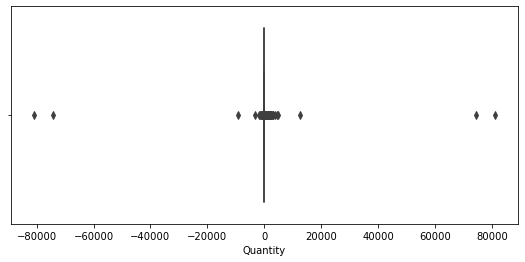

In [32]:
#Univariate analysis Quantity
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(train['Quantity'])

<AxesSubplot:xlabel='Quantity'>

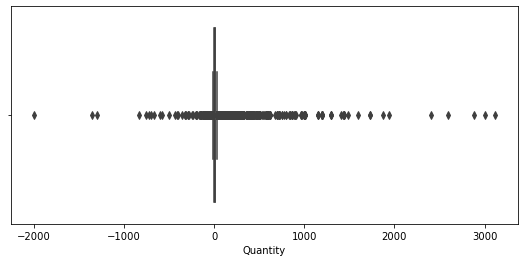

In [33]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(test['Quantity'])

**The negative values indicate returned items**

<AxesSubplot:xlabel='UnitPrice'>

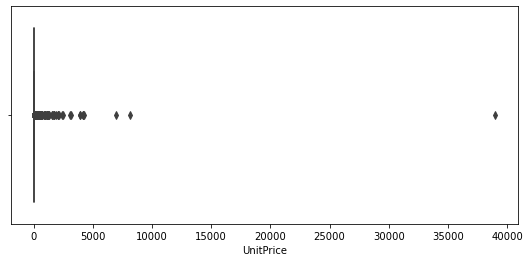

In [34]:
#Univariate analysis UnitPrice
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(train['UnitPrice'])

<AxesSubplot:xlabel='UnitPrice'>

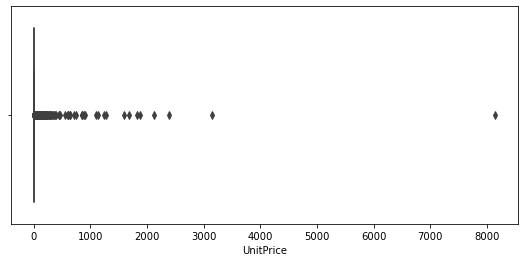

In [35]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(test['UnitPrice'])

In [36]:
#The invoiceno that contains C letter means the item is returned then removing them means removing the negative values
train = train[~train["InvoiceNo"].str.contains("C", na = False)]
test = test[~test["InvoiceNo"].str.contains("C", na = False)]

In [37]:
train.describe()

,Quantity,UnitPrice,CustomerID
count,276221.000000,276221.000000,276221.000000
mean,13.249767,3.116764,15290.227072
std,214.731317,19.735168,1712.202842
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,4161.060000,18287.000000


In [38]:
test.describe()

,Quantity,UnitPrice,CustomerID
count,118600.000000,118600.000000,118600.000000
mean,12.744393,3.133363,15291.407243
std,42.472068,27.036860,1716.443125
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13952.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16800.000000
max,3114.000000,8142.750000,18287.000000


In [39]:
train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<AxesSubplot:xlabel='Quantity'>

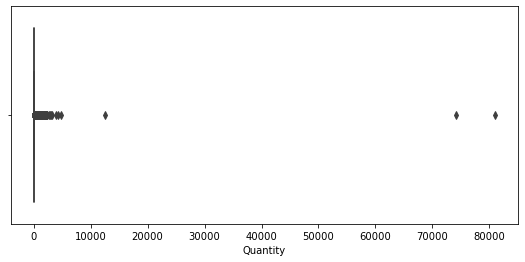

In [40]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(train['Quantity'])

<AxesSubplot:xlabel='Quantity'>

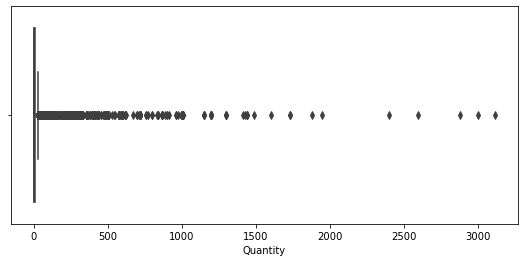

In [41]:
f1 = plt.figure(figsize=(20,4))
f1.add_subplot(1,2,1)
sns.boxplot(test['Quantity'])

**There are some positive outliers**

<AxesSubplot:xlabel='Quantity'>

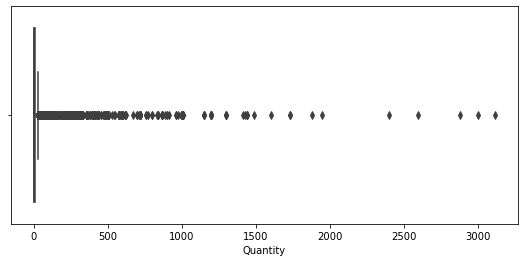

In [42]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(test['Quantity'])

**No more negative values**


In [43]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom


In [44]:
train.shape

(276221, 8)

In [45]:
cols = ['Quantity', 'UnitPrice']

Q1 = train[cols].quantile(0.25)
Q3 = train[cols].quantile(0.75)
IQR = Q3 - Q1

train = train[~((train[cols] < (Q1 - 1.5 * IQR)) |(train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
cols_t = ['Quantity', 'UnitPrice']

Q1_t = test[cols].quantile(0.25)
Q3_t = test[cols].quantile(0.75)
IQR_t = Q3_t- Q1_t

test = test[~((test[cols_t] < (Q1_t - 1.5 * IQR_t)) |(test[cols_t] > (Q3_t + 1.5 * IQR_t))).any(axis=1)]

In [47]:
train.shape , test.shape

((234511, 8), (100729, 8))

<AxesSubplot:xlabel='Quantity'>

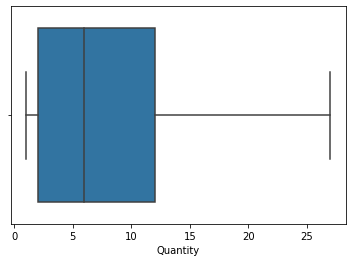

In [48]:
sns.boxplot(train['Quantity'])

<AxesSubplot:xlabel='Quantity'>

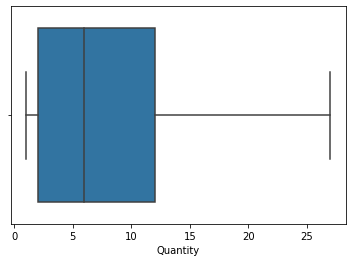

In [49]:
sns.boxplot(test['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

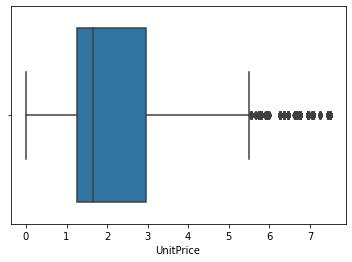

In [50]:
sns.boxplot(train['UnitPrice'])

<AxesSubplot:xlabel='UnitPrice'>

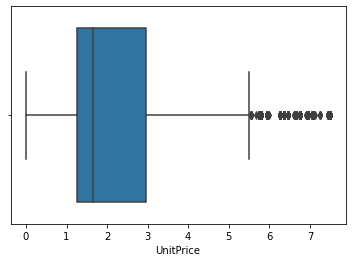

In [51]:
sns.boxplot(test['UnitPrice'])

In [52]:
#removing the outliers for the second time of UnitPrice column
cols_ = [ 'UnitPrice']

Q1_ = train[cols_].quantile(0.25)
Q3_ = train[cols_].quantile(0.75)
IQR_ = Q3_ - Q1_

train = train[~((train[cols_] < (Q1_ - 1.5 * IQR)) |(train[cols_] > (Q3_ + 1.5 * IQR_))).any(axis=1)]

<AxesSubplot:xlabel='UnitPrice'>

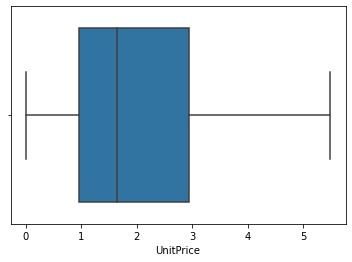

In [53]:
sns.boxplot(train['UnitPrice'])

In [54]:
#removing the outliers for the second time of UnitPrice column
cols_t1 = [ 'UnitPrice']

Q1_t1 = test[cols_].quantile(0.25)
Q3_t1 = test[cols_].quantile(0.75)
IQR_t1 = Q3_t1 - Q1_t1

test = test[~((test[cols_t1] < (Q1_t1 - 1.5 * IQR_t1)) |(test[cols_t1] > (Q3_t1 + 1.5 * IQR_t1))).any(axis=1)]

<AxesSubplot:xlabel='UnitPrice'>

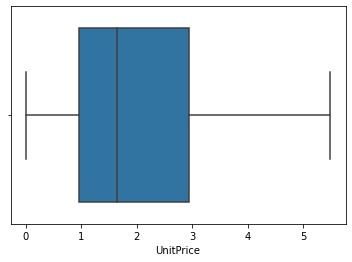

In [55]:
sns.boxplot(test['UnitPrice'])

## Cohort Analysis

In [56]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [57]:
df.shape

(319931, 9)

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,test
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,test
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,test
9,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom,test
10,576249,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2011-11-14 13:47:00,1.65,17811.0,United Kingdom,test


In [59]:
# creat an invoice month
# function for month
def get_month(x):
    return dt.datetime(x.year,x.month,1)
# apply the function
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)

In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind,InvoiceMonth
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,test,2011-09-01
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,test,2010-12-01
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,test,2011-08-01
9,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom,test,2011-12-01
10,576249,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2011-11-14 13:47:00,1.65,17811.0,United Kingdom,test,2011-11-01


In [61]:
# creat a column index with the minimum invoiceDate (first time customer was aqcuired)
df['CohortMonth']=df.groupby('CustomerID')['InvoiceMonth'].transform(min)

In [62]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind,InvoiceMonth,CohortMonth
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,test,2011-09-01,2011-09-01
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,test,2010-12-01,2010-12-01
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,test,2011-08-01,2011-02-01
9,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom,test,2011-12-01,2011-06-01
10,576249,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2011-11-14 13:47:00,1.65,17811.0,United Kingdom,test,2011-11-01,2011-01-01
11,560828,84387A,BIRD ON BRANCH CANVAS SCREEN,11,2011-07-21 11:55:00,1.95,14298.0,United Kingdom,test,2011-07-01,2010-12-01
15,559346,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,24,2011-07-07 17:19:00,0.19,13486.0,United Kingdom,test,2011-07-01,2011-07-01
16,579408,23220,REINDEER HEART DECORATION GOLD,3,2011-11-29 12:34:00,0.83,14701.0,United Kingdom,test,2011-11-01,2011-01-01
17,578548,35833P,4 PINK FLOCK CHRISTMAS BALLS,9,2011-11-24 15:02:00,1.25,17345.0,United Kingdom,test,2011-11-01,2011-05-01
18,581450,22723,SET OF 6 HERB TINS SKETCHBOOK,1,2011-12-08 17:54:00,1.25,16794.0,United Kingdom,test,2011-12-01,2011-06-01


In [63]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind,InvoiceMonth,CohortMonth
379302,540538,20969,RED FLORAL FELTCRAFT SHOULDER BAG,1,2011-01-09 14:36:00,3.75,17841.0,United Kingdom,train,2011-01-01,2010-12-01
379303,549933,21733,RED HANGING HEART T-LIGHT HOLDER,6,2011-04-13 11:04:00,2.95,15230.0,United Kingdom,train,2011-04-01,2011-04-01
379304,538517,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,2,2010-12-12 16:05:00,1.45,17618.0,United Kingdom,train,2010-12-01,2010-12-01
379305,545053,22318,FIVE HEART HANGING DECORATION,3,2011-02-27 12:41:00,2.95,17516.0,United Kingdom,train,2011-02-01,2011-02-01
379306,550701,47566,PARTY BUNTING,8,2011-04-20 10:48:00,4.95,14905.0,United Kingdom,train,2011-04-01,2011-04-01
379307,561695,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,2011-07-29 10:00:00,1.45,14005.0,United Kingdom,train,2011-07-01,2011-05-01
379308,559155,21507,"ELEPHANT, BIRTHDAY CARD,",12,2011-07-06 15:49:00,0.42,13418.0,United Kingdom,train,2011-07-01,2010-12-01
379309,568064,23347,I LOVE LONDON BEAKER,12,2011-09-23 13:42:00,1.25,14880.0,United Kingdom,train,2011-09-01,2011-02-01
379311,560368,21558,SKULL LUNCH BOX WITH CUTLERY,5,2011-07-18 12:25:00,2.55,17841.0,United Kingdom,train,2011-07-01,2010-12-01
379313,564168,21899,GARAGE KEY FOB,2,2011-08-23 13:51:00,0.65,16794.0,United Kingdom,train,2011-08-01,2011-06-01


In [64]:
#creat a date element function to get series of substractions
def get_date_elemnts(data,column):
    day=data[column].dt.day
    month=data[column].dt.month
    year=data[column].dt.year
    return day, month, year

In [65]:
#get date elemnts for out cohort and invoice column
_,Invoice_Month,Invoice_Year =get_date_elemnts(df,'InvoiceMonth')
_,Cohort_Month,cohort_Year =get_date_elemnts(df,'CohortMonth')

In [66]:
#create cohort index
year_diff= Invoice_Year-cohort_Year
month_diff= Invoice_Month-Cohort_Month
df['cohortIndex']=(year_diff*12)+(month_diff+1)
df.head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind,InvoiceMonth,CohortMonth,cohortIndex
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,test,2011-09-01,2011-09-01,1
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,test,2010-12-01,2010-12-01,1
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,test,2011-08-01,2011-02-01,7
9,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom,test,2011-12-01,2011-06-01,7
10,576249,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2011-11-14 13:47:00,1.65,17811.0,United Kingdom,test,2011-11-01,2011-01-01,11
11,560828,84387A,BIRD ON BRANCH CANVAS SCREEN,11,2011-07-21 11:55:00,1.95,14298.0,United Kingdom,test,2011-07-01,2010-12-01,8
15,559346,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,24,2011-07-07 17:19:00,0.19,13486.0,United Kingdom,test,2011-07-01,2011-07-01,1
16,579408,23220,REINDEER HEART DECORATION GOLD,3,2011-11-29 12:34:00,0.83,14701.0,United Kingdom,test,2011-11-01,2011-01-01,11
17,578548,35833P,4 PINK FLOCK CHRISTMAS BALLS,9,2011-11-24 15:02:00,1.25,17345.0,United Kingdom,test,2011-11-01,2011-05-01,7
18,581450,22723,SET OF 6 HERB TINS SKETCHBOOK,1,2011-12-08 17:54:00,1.25,16794.0,United Kingdom,test,2011-12-01,2011-06-01,7


In [67]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind,InvoiceMonth,CohortMonth,cohortIndex
379324,537219,85035A,GARDENIA 3 WICK MORRIS BOXED CANDLE,1,2010-12-05 15:47:00,4.25,14081.0,United Kingdom,train,2010-12-01,2010-12-01,1
379327,546027,22617,BAKING SET SPACEBOY DESIGN,3,2011-03-09 08:09:00,4.95,12759.0,Netherlands,train,2011-03-01,2011-03-01,1
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,train,2011-05-01,2010-12-01,6
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,train,2011-10-01,2011-10-01,1
379335,576771,23159,SET OF 5 PANCAKE DAY MAGNETS,12,2011-11-16 13:19:00,2.08,13285.0,United Kingdom,train,2011-11-01,2011-02-01,10


In [68]:
#count the custmoerID by grouping by cohortMonth and cohortIndex
cohort_data=df.groupby(['CohortMonth','cohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,cohortIndex,CustomerID
0,2010-12-01,1,828
1,2010-12-01,2,298
2,2010-12-01,3,258
3,2010-12-01,4,303
4,2010-12-01,5,292
...,...,...,...
86,2011-10-01,2,82
87,2011-10-01,3,40
88,2011-11-01,1,316
89,2011-11-01,2,35


In [69]:
#creat a pivot table
cohort_table=cohort_data.pivot(index='CohortMonth',columns=['cohortIndex'],values='CustomerID')
cohort_table

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,828.0,298.0,258.0,303.0,292.0,327.0,297.0,277.0,282.0,311.0,300.0,412.0,210.0
2011-01-01,397.0,81.0,105.0,91.0,125.0,114.0,96.0,97.0,122.0,129.0,146.0,47.0,NaN
2011-02-01,359.0,61.0,66.0,101.0,96.0,87.0,87.0,95.0,92.0,108.0,24.0,NaN,NaN
2011-03-01,440.0,65.0,111.0,86.0,100.0,74.0,112.0,103.0,121.0,38.0,NaN,NaN,NaN
2011-04-01,284.0,57.0,57.0,57.0,53.0,67.0,63.0,72.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,276.0,49.0,44.0,47.0,60.0,62.0,76.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,234.0,42.0,34.0,62.0,54.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,31.0,39.0,44.0,53.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,31.0,42.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohortIndex', ylabel='CohortMonth'>

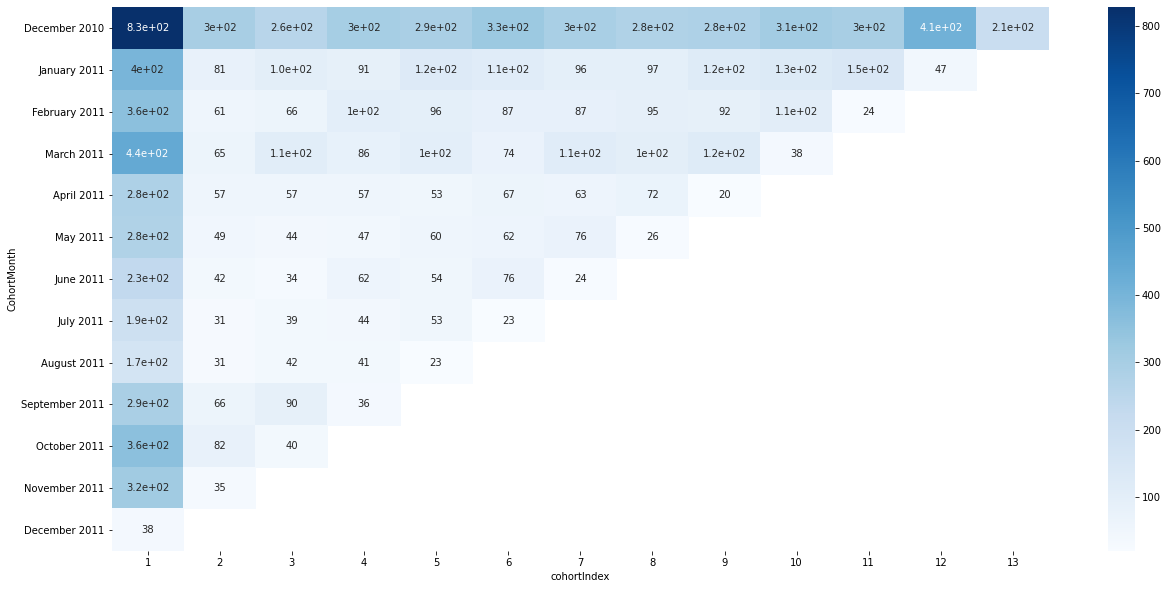

In [70]:
#change index
cohort_table.index=cohort_table.index.strftime('%B %Y')
#creat heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')
            

In [71]:
#creat cohort table for percentages(we divided by first element in each row)
new_cohort_table=cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,1.0,0.359903,0.311594,0.365942,0.352657,0.394928,0.358696,0.334541,0.340580,0.375604,0.362319,0.497585,0.253623
January 2011,1.0,0.204030,0.264484,0.229219,0.314861,0.287154,0.241814,0.244332,0.307305,0.324937,0.367758,0.118388,NaN
February 2011,1.0,0.169916,0.183844,0.281337,0.267409,0.242340,0.242340,0.264624,0.256267,0.300836,0.066852,NaN,NaN
March 2011,1.0,0.147727,0.252273,0.195455,0.227273,0.168182,0.254545,0.234091,0.275000,0.086364,NaN,NaN,NaN
April 2011,1.0,0.200704,0.200704,0.200704,0.186620,0.235915,0.221831,0.253521,0.070423,NaN,NaN,NaN,NaN
May 2011,1.0,0.177536,0.159420,0.170290,0.217391,0.224638,0.275362,0.094203,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.179487,0.145299,0.264957,0.230769,0.324786,0.102564,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.162304,0.204188,0.230366,0.277487,0.120419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.186747,0.253012,0.246988,0.138554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohortIndex', ylabel='CohortMonth'>

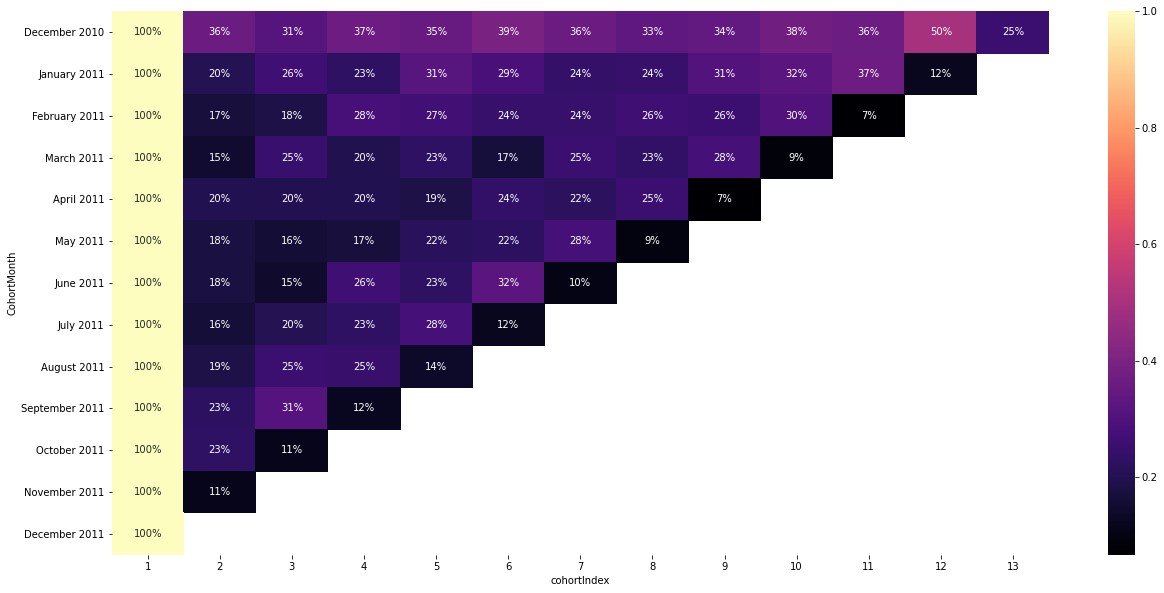

In [72]:
#creat percentage visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,cmap='magma',fmt='.0%')

In [73]:
#creat revenue contribtued per custmoer coloumn
df['revenue']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ind,InvoiceMonth,CohortMonth,cohortIndex,revenue
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,test,2011-09-01,2011-09-01,1,5.04
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,test,2010-12-01,2010-12-01,1,15.30
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,test,2011-08-01,2011-02-01,7,25.00
9,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom,test,2011-12-01,2011-06-01,7,1.65
10,576249,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2011-11-14 13:47:00,1.65,17811.0,United Kingdom,test,2011-11-01,2011-01-01,11,3.30


In [74]:
revenue_contributed=df.groupby('CustomerID')['revenue'].sum()
revenue_contributed=revenue_contributed.reset_index()
revenue_contributed.head()

,CustomerID,revenue
0,12347.0,3243.33
1,12348.0,90.20
2,12349.0,918.10
3,12350.0,294.40
4,12352.0,986.34


In [75]:
frequency=df.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12347.0,164
1,12348.0,6
2,12349.0,53
3,12350.0,16
4,12352.0,59


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319931 entries, 2 to 379335
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     319931 non-null  object        
 1   StockCode     319931 non-null  object        
 2   Description   319931 non-null  object        
 3   Quantity      319931 non-null  int64         
 4   InvoiceDate   319931 non-null  datetime64[ns]
 5   UnitPrice     319931 non-null  float64       
 6   CustomerID    319931 non-null  float64       
 7   Country       319931 non-null  object        
 8   ind           319931 non-null  object        
 9   InvoiceMonth  319931 non-null  datetime64[ns]
 10  CohortMonth   319931 non-null  datetime64[ns]
 11  cohortIndex   319931 non-null  int64         
 12  revenue       319931 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(2), object(5)
memory usage: 34.2+ MB


In [77]:
df['duration']=df['InvoiceDate'].max()-df['InvoiceDate']
df['duration']

2         74 days 23:08:00
6        360 days 01:08:00
8        129 days 23:21:00
9          0 days 18:56:00
10        24 days 23:03:00
                ...       
379324   368 days 21:03:00
379327   275 days 04:41:00
379330   203 days 22:15:00
379333    46 days 22:03:00
379335    22 days 23:31:00
Name: duration, Length: 319931, dtype: timedelta64[ns]

In [78]:
recency=df.groupby('CustomerID')['duration'].min()
recency=recency.reset_index()
recency.head()

,CustomerID,duration
0,12347.0,1 days 20:58:00
1,12348.0,248 days 02:03:00
2,12349.0,18 days 02:59:00
3,12350.0,309 days 20:49:00
4,12352.0,35 days 22:13:00


In [79]:
#merging the columns
rf=pd.merge(revenue_contributed,frequency,on='CustomerID',how='inner')
rfm=pd.merge(rf,recency,on='CustomerID',how='inner')
rfm.columns=['CustomerID','revenue','frequency','recency']
rfm['recency']=rfm['recency'].dt.days
rfm.head()

,CustomerID,revenue,frequency,recency
0,12347.0,3243.33,164,1
1,12348.0,90.20,6,248
2,12349.0,918.10,53,18
3,12350.0,294.40,16,309
4,12352.0,986.34,59,35


<AxesSubplot:xlabel='revenue'>

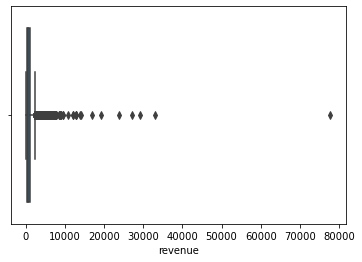

In [80]:
sns.boxplot(rfm['revenue'])

<AxesSubplot:xlabel='frequency'>

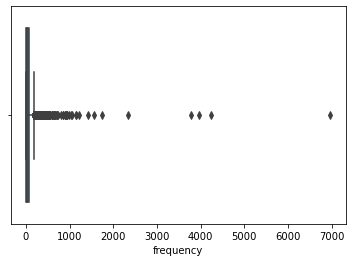

In [81]:
sns.boxplot(rfm['frequency'])

<AxesSubplot:xlabel='recency'>

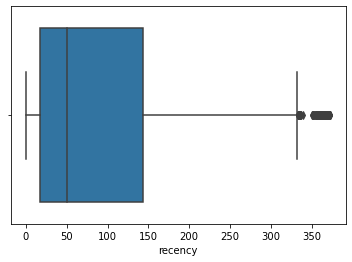

In [82]:
sns.boxplot(rfm['recency'])

In [83]:
q1_rev = rfm['revenue'].quantile(0.05)
q3_rev= rfm['revenue'].quantile(0.95)
IQR = q3_rev - q1_rev
rfm = rfm[(rfm['revenue'] >= q1_rev - 1.5*IQR) & (rfm['revenue'] <= q3_rev + 1.5*IQR)]

q1_freq = rfm['frequency'].quantile(0.05)
q3_freq = rfm['frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
rfm = rfm[(rfm['frequency'] >= q1_freq - 1.5*IQR) & (rfm['frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = rfm['recency'].quantile(0.05)
q3_rec = rfm['recency'].quantile(0.95)
IQR = q3_rec - q1_rec
rfm = rfm[(rfm['recency'] >= q1_rec - 1.5*IQR) & (rfm['recency'] <= q3_rec + 1.5*IQR)]

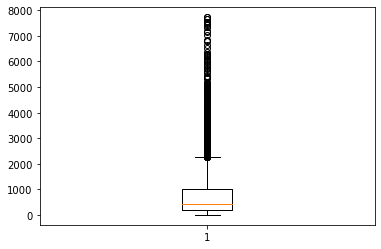

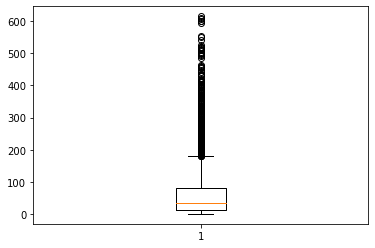

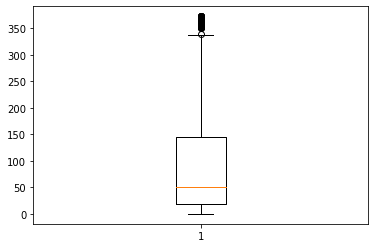

In [84]:
plt.boxplot(rfm['revenue'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['recency'])
plt.show()

In [85]:
rfm.isnull().sum()

CustomerID    0
revenue       0
frequency     0
recency       0
dtype: int64

In [86]:
rfm.dropna(inplace=True)

In [87]:
rfm.isnull().sum()

CustomerID    0
revenue       0
frequency     0
recency       0
dtype: int64

In [88]:
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,CustomerID,revenue,frequency,recency
count,4133.000000,4133.000000,4133.000000,4133.000000
mean,15293.523107,829.933863,64.515848,92.505928
std,1719.964258,1075.480288,83.386120,100.090048
min,12347.000000,0.000000,1.000000,0.000000
25%,13810.000000,186.820000,14.000000,18.000000
50%,15291.000000,425.580000,34.000000,51.000000
75%,16775.000000,1017.510000,81.000000,146.000000
90%,17671.800000,2065.540000,160.000000,263.000000
95%,17975.400000,3023.372000,237.000000,311.000000
99%,18223.680000,5294.979600,411.000000,368.000000


In [89]:
rfm.isnull().sum()

CustomerID    0
revenue       0
frequency     0
recency       0
dtype: int64

In [90]:
rfm.isnull().sum()

CustomerID    0
revenue       0
frequency     0
recency       0
dtype: int64

In [91]:
rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,19,51,150,263,373], labels=[5,4,3,2,1])
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,14,34,81,160,615], labels=[1,2,3,4,5])
rfm['monetary_score'] = pd.cut(rfm['revenue'], bins=[0,186,425,1017,2065,7800], labels=[1,2,3,4,5])

In [92]:
rfm.isnull().sum()

CustomerID          0
revenue             0
frequency           0
recency             0
recency_score      77
frequency_score     0
monetary_score      1
dtype: int64

In [93]:
rfm.dropna(inplace=True)

In [94]:
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [95]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 0 to 4178
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4055 non-null   float64
 1   revenue          4055 non-null   float64
 2   frequency        4055 non-null   int64  
 3   recency          4055 non-null   int64  
 4   recency_score    4055 non-null   int32  
 5   frequency_score  4055 non-null   int32  
 6   monetary_score   4055 non-null   int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 205.9 KB


In [96]:
rfm.head()

,CustomerID,revenue,frequency,recency,recency_score,frequency_score,monetary_score
0,12347.0,3243.33,164,1,5,5,5
1,12348.0,90.20,6,248,2,1,1
2,12349.0,918.10,53,18,5,3,3
3,12350.0,294.40,16,309,1,2,2
4,12352.0,986.34,59,35,4,3,3


In [97]:
def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
rfm['score'] = rfm.apply(score_rfm,axis=1 )
rfm.head()

,CustomerID,revenue,frequency,recency,recency_score,frequency_score,monetary_score,score
0,12347.0,3243.33,164,1,5,5,5,15.0
1,12348.0,90.20,6,248,2,1,1,4.0
2,12349.0,918.10,53,18,5,3,3,11.0
3,12350.0,294.40,16,309,1,2,2,5.0
4,12352.0,986.34,59,35,4,3,3,10.0


In [98]:
rfm.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    4055.000000
mean        8.537608
std         3.240257
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
90%        13.000000
95%        14.000000
99%        15.000000
max        15.000000
Name: score, dtype: float64

In [99]:
rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head()

,CustomerID,revenue,frequency,recency,recency_score,frequency_score,monetary_score,score,customer_type
0,12347.0,3243.33,164,1,5,5,5,15.0,Platinum
1,12348.0,90.20,6,248,2,1,1,4.0,Bad
2,12349.0,918.10,53,18,5,3,3,11.0,Silver
3,12350.0,294.40,16,309,1,2,2,5.0,Bad
4,12352.0,986.34,59,35,4,3,3,10.0,Silver


In [100]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         31.0
Silver      28.0
Bronze      21.0
Gold        12.0
Platinum     8.0
Name: customer_type, dtype: float64

- **8% of the customer are in the platinum category these customers are the best customers based on recency,frequency and montery scores**
- **The marketing team may choose to target the silver catoergy to turn them into gold cateogry by giving them offers**
- **The bad category are those who have not pruchased for long time and they do not have valuable contribuiton to the business so they are mostly customers we lost I think that putting offer to bring them back does not worth their contribtution to the business so we may focus on other cateogries to level them up to a better cateogry**

In [101]:
rfm.groupby('customer_type')['recency_score','frequency_score','monetary_score'].mean().round(0)


,recency_score,frequency_score,monetary_score
customer_type,,,
Bad,2.0,1.0,1.0
Bronze,3.0,2.0,2.0
Silver,4.0,3.0,3.0
Gold,4.0,4.0,4.0
Platinum,5.0,5.0,5.0


## K-Means Clustering

In [102]:
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()


,CustomerID,revenue,frequency,recency
0,12347.0,3243.33,164,1
1,12348.0,90.20,6,248
2,12349.0,918.10,53,18
3,12350.0,294.40,16,309
4,12352.0,986.34,59,35


In [103]:
df_kmeans = df_kmeans.iloc[:,1:]

In [104]:
#scaling the features
scale=StandardScaler()
colss=['revenue','frequency','recency']
df_kmeans_scaler=scale.fit_transform(df_kmeans[colss])

In [105]:
model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_scaler)


KMeans(n_clusters=5)

In [106]:
df_kmeans_scaled=pd.DataFrame(df_kmeans_scaler)
df_kmeans_scaled.columns=['revenue','frequency','recency']
df_kmeans_scaled.head()

,revenue,frequency,recency
0,2.341484,1.235623,-0.930879
1,-0.686356,-0.696530,1.534031
2,0.108647,-0.121775,-0.761229
3,-0.490270,-0.574242,2.142773
4,0.174175,-0.048403,-0.591580


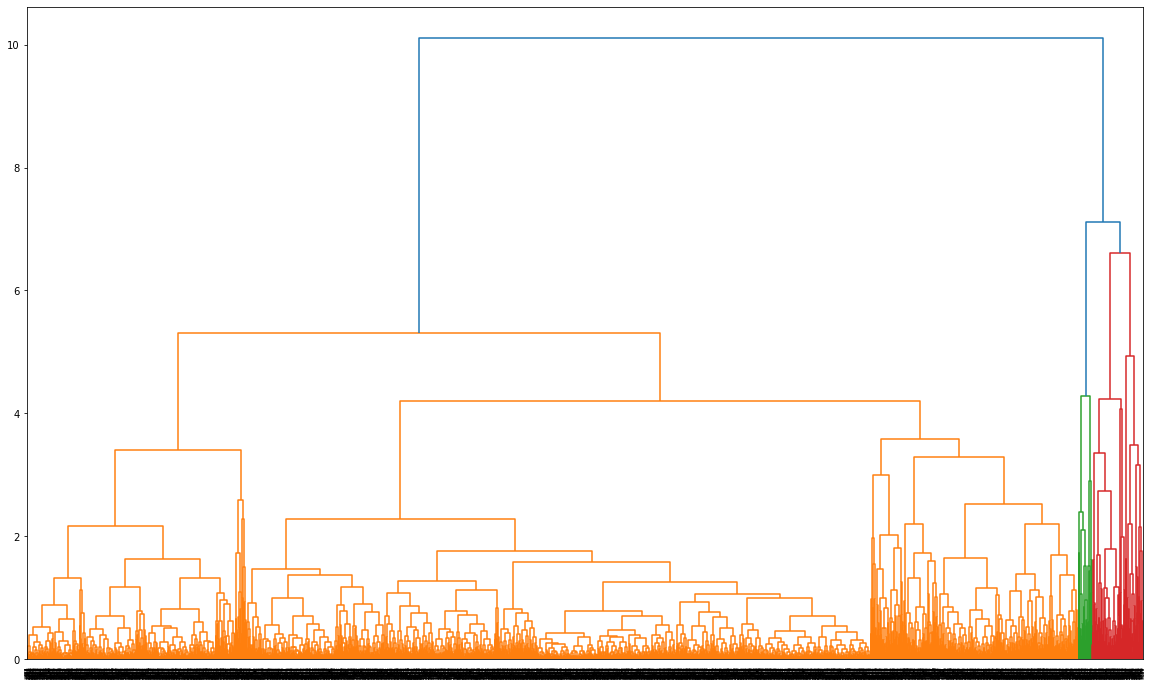

In [107]:
plt.figure(figsize=(20,12))

mergings = linkage(df_kmeans_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [108]:
# clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [109]:
# assign cluster labels
pd.set_option('display.max_rows', None)
df_kmeans['cluster_labels'] = cluster_labels
df_kmeans.head(80)

,revenue,frequency,recency,cluster_labels
0,3243.33,164,1,0
1,90.20,6,248,1
2,918.10,53,18,0
3,294.40,16,309,1
4,986.34,59,35,0
5,29.30,2,203,1
6,664.84,39,231,1
7,219.00,9,213,1
8,919.76,31,245,1
9,2827.66,88,32,0


In [110]:
df_kmeans.groupby('cluster_labels').mean().round(0)


,revenue,frequency,recency
cluster_labels,,,
0,710.0,55.0,54.0
1,265.0,20.0,271.0
2,3563.0,244.0,20.0
3,5768.0,321.0,15.0
4,2274.0,447.0,18.0


### Elbow Method to find optimal number of clusters

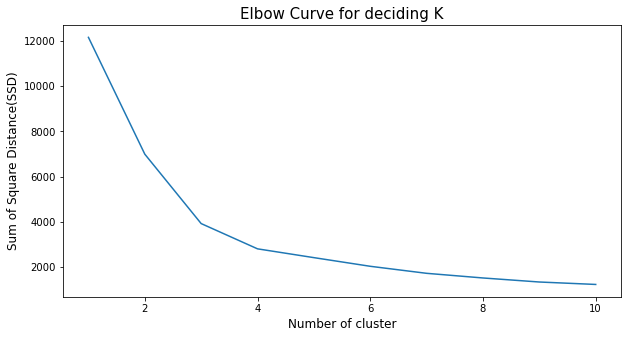

In [111]:
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_scaler)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

**from the graph I think that 3 is the right number of clusters**

In [117]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_scaler)

KMeans(n_clusters=3)

In [118]:
df_kmeans['cluster_labels'] = model_clus3.labels_
df_kmeans.head()

,revenue,frequency,recency,cluster_labels
0,3243.33,164,1,2
1,90.20,6,248,1
2,918.10,53,18,0
3,294.40,16,309,1
4,986.34,59,35,0


In [121]:
df_kmeans.groupby('cluster_labels').mean().round(0)


,revenue,frequency,recency
cluster_labels,,,
0,635.0,49.0,46.0
1,265.0,22.0,247.0
2,3134.0,248.0,23.0


<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

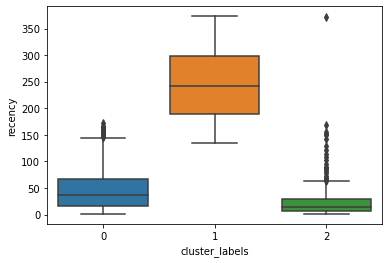

In [122]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=df_kmeans)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

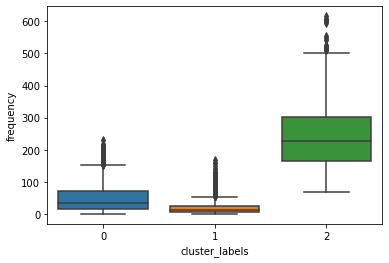

In [123]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=df_kmeans)

<AxesSubplot:xlabel='cluster_labels', ylabel='revenue'>

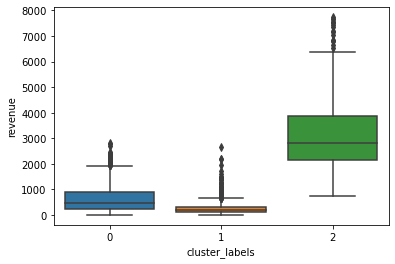

In [124]:
# plots
sns.boxplot(x='cluster_labels', y='revenue', data=df_kmeans)

# Conclusion

- **Cluster 0 belongs to new customers (recent shopper with low frequency and spending)**
**Actions to take:*
    - **Emphasizing the customer relationship management to enhance shopping experience and hence stenghten the engagement**
    ****************************
- **Cluster 1 belongs to most probably lost customers (low frequency and spending amount have not ordered for a long time)**
**Actions to take:*
    - **Business might have lost them, survey to be done on reason of being churned, enhance the quality of products and services to avoid future losses**
    ****************************
- **Cluster 2 belongs to best customers (frequent and recent shoppers, heavy spendings)**
**Actions to take:*
    - **They can be target customers to launch new products**   

**Note: currently working on Tableau to prepare dashboard to make visualization, the dashboard can be presented to the marketing team or the stakeholders along with the Customer Segmentation analyis to take data driven decision to improve the business**